<a href="https://colab.research.google.com/github/tavaresRamon/CONSULTORIA/blob/main/ANALISEDESCRITIVACONSULTORIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [294]:
# Esta an alise descritiva representa uma empresa de tecnologia fictıcia representando um
# cen ́ario hipot ́etico com uma equipe global, composta por 576,892 funcion ́arios. Este re-
# latorio visa oferecer uma an ́alise descritiva das vari ́aveis-chave que caracterizam esse corpo
# de colaboradores: Idade, Sal ́ario, Sexo e Escolaridade. Os dados apresentados s ̃ao fict ́ıcios
# e foram gerados com o prop ́osito de ilustrar um contexto amplo e diversificado. Com 4
# vari ́aveis em foco, o conjunto de informa ̧c ̃oes totaliza 576,892 observa ̧c ̃oes, proporcionando
# uma vis ̃ao abrangente das caracter ́ısticas qualitativas e quantitativas dos colaboradores
# imagin ́arios dessa empresa de tecnologia.
funcionarios = 576892

idade = np.random.randint(18,65,funcionarios)

salario = np.round(np.random.uniform(1000, 75000, funcionarios), 2)

sexo = np.random.choice(['Masculino', 'Feminino'],
                        size= funcionarios,p=[0.372, 1-0.372])

escolaridade = np.random.choice(['Ensino Médio','Graduação','Pós Graduação'],
                                size= funcionarios,p=[0.3, 0.5, 0.2])

In [296]:
dados = pd.DataFrame({
  'Idade': idade,
  'Salário':salario,
  'Sexo':sexo,
  'Escolaridade':escolaridade
})

In [297]:
tipoDados = dados.dtypes
print(tipoDados)

Idade             int64
Salário         float64
Sexo             object
Escolaridade     object
dtype: object


In [298]:
#FREQUÊNCIA RELATIVA SEXO
#DESCRITIVA QUALITATIVA
def frequenciaRelativa(df,var):
  contagem = df[var].value_counts()
  freqRelativa = df[var].value_counts(normalize=True) *100
  resultado =  pd.DataFrame({
      'Contagem': contagem,
      'Porcentagem (%)': np.round(freqRelativa,2)
  })
  return resultado

In [300]:
freqSexo = frequenciaRelativa(dados,'Sexo')
print("\nFrequência Relativa do Sexo:")
print(freqSexo)
freqEscolaridade = frequenciaRelativa(dados,'Escolaridade')
print("\nFrequência Relativa da Escolaridade:")
print(freqEscolaridade)


Frequência Relativa do Sexo:
           Contagem  Porcentagem (%)
Feminino     361269            62.62
Masculino    215623            37.38

Frequência Relativa da Escolaridade:
               Contagem  Porcentagem (%)
Graduação        288860            50.07
Ensino Médio     172701            29.94
Pós Graduação    115331            19.99


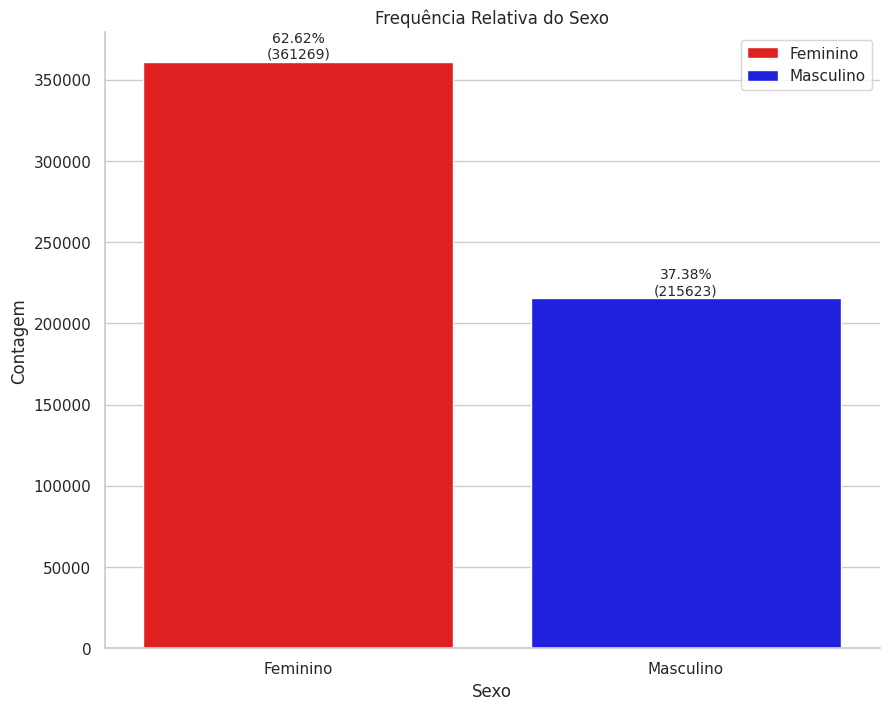

In [339]:
plt.figure(figsize=(10, 8))

# Gráfico de barras vertical para Sexo
ax = sns.barplot(x=freqSexo.index, y=freqSexo['Contagem'],
                 hue=freqSexo.index,
                 palette={'Masculino': 'blue', 'Feminino': 'red'},
                 legend=True)
plt.title('Frequência Relativa do Sexo')
plt.xlabel('Sexo')
plt.ylabel('Contagem')

# Adicionando porcentagens e quantidades acima das barras
for index, (count, percent) in enumerate(zip(freqSexo['Contagem'],
                                             freqSexo['Porcentagem (%)'])):
    plt.text(index, count + 200, f'{percent:.2f}%\n({count})',
             ha='center',
             va='bottom', fontsize=10)

# Remover as bordas da direita e de cima
sns.despine(right=True, top=True, ax=ax)

plt.legend()
plt.show()


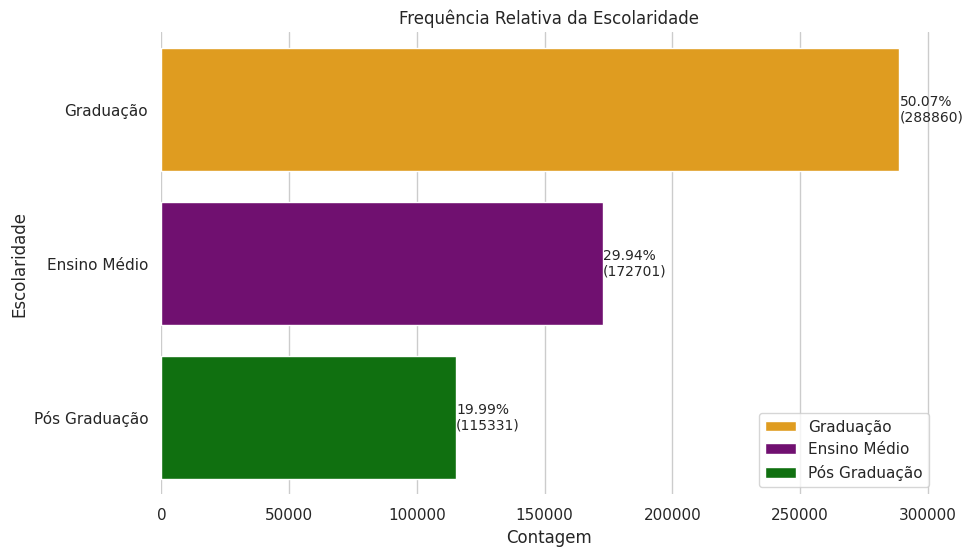

In [340]:
plt.figure(figsize=(10, 6))

sns.barplot(x='Contagem', y=freqEscolaridade.index,
            data=freqEscolaridade, orient='h',
            hue=freqEscolaridade.index,
            palette={'Pós Graduação': 'green',
                     'Graduação': 'orange',
                     'Ensino Médio': 'purple'}, legend=True)

# Remover todas as bordas de grade
sns.despine(left=True, right=True, top=True, bottom=True)

plt.title('Frequência Relativa da Escolaridade')
plt.xlabel('Contagem')
plt.ylabel('Escolaridade')

# Adicionando porcentagens e quantidades ao lado das barras
for index, (value, percent) in enumerate(
    zip(freqEscolaridade['Contagem'],
        freqEscolaridade['Porcentagem (%)'])):

    plt.text(value + 50, index, f'{percent:.2f}%\n({value})',
             ha='left',
             va='center', fontsize=10)

plt.legend()
plt.show()


In [303]:
#OBTENDO ESTATÍSTICAS DESCRITIVAS PARA DADOS QUANTITATIVOS
descritivaQuantitativa = dados.describe()
print(descritivaQuantitativa)

               Idade        Salário
count  576892.000000  576892.000000
mean       40.993037   38035.360327
std        13.574780   21350.095451
min        18.000000    1000.400000
25%        29.000000   19554.317500
50%        41.000000   38053.940000
75%        53.000000   56488.295000
max        64.000000   74999.960000


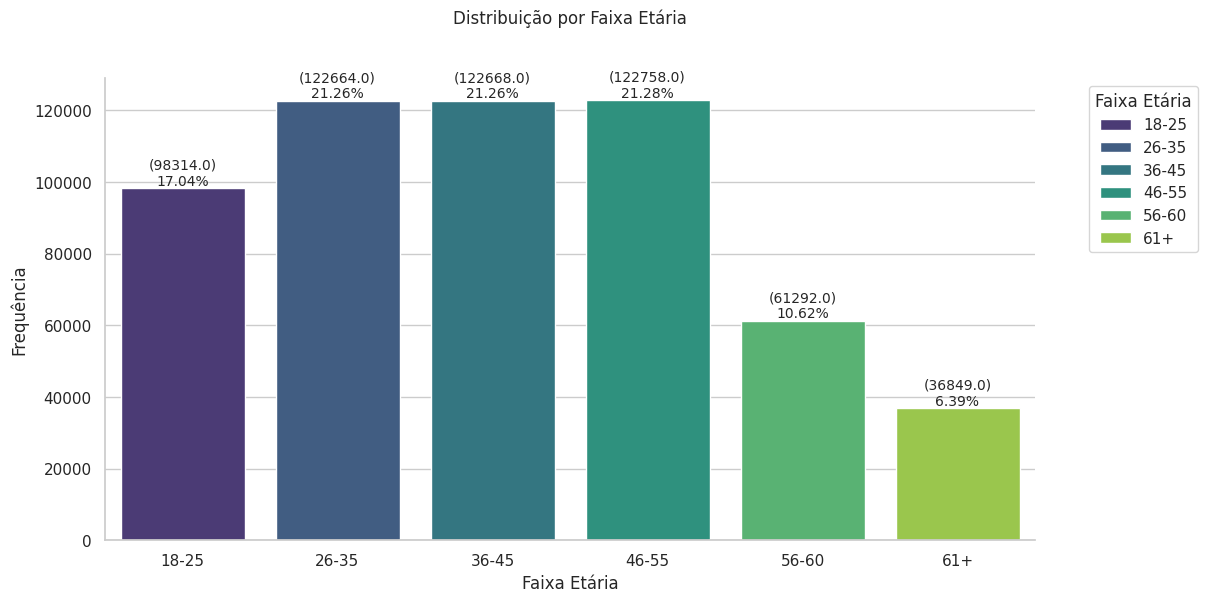

In [305]:
# Definindo as faixas etárias
faixas_etarias = ['18-25', '26-35', '36-45', '46-55', '56-60', '61+']

# Substituindo espaços por underscores no nome da coluna
dados['Faixa_Etaria'] = pd.cut(dados['Idade'],
                               bins=[18, 26, 36, 46, 56, 61, float('inf')],
                               labels= faixas_etarias)

# Criando o gráfico de classes
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Faixa_Etaria',
                   data=dados,
                   hue='Faixa_Etaria',
                   palette='viridis',
                   dodge=False)

# Removendo as linhas de grade
sns.despine()

# Ajustando a posição da legenda
plt.legend(title='Faixa Etária', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adicionando a quantidade e a porcentagem acima das barras
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'({height})\n{height / len(dados) * 100:.2f}%',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10)

plt.title('Distribuição por Faixa Etária', y=1.1)
plt.xlabel('Faixa Etária')
plt.ylabel('Frequência')
plt.show()


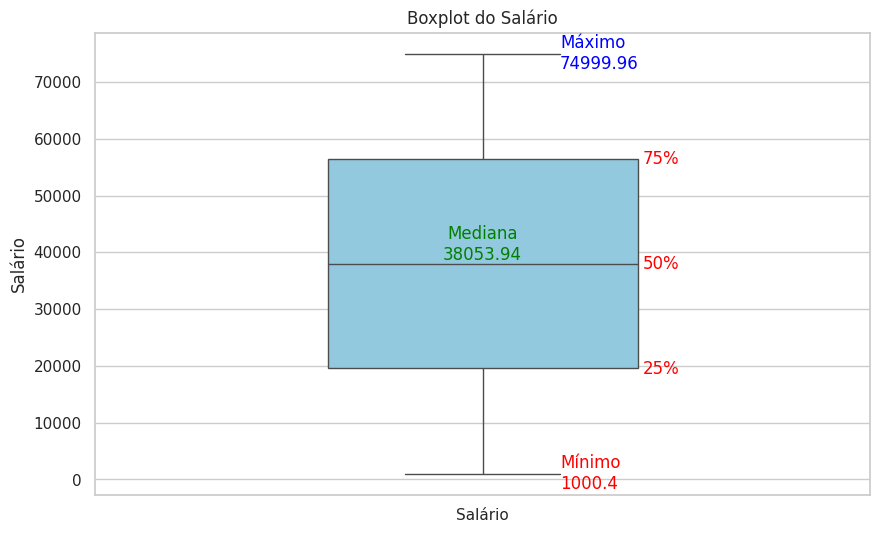

In [309]:
# Gráfico de boxplot
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.boxplot(data=dados[['Salário']], color='skyblue', width=0.4)

percentiles = [25, 50, 75]
for percentile in percentiles:
    plt.text(0.23, dados['Salário'].quantile(percentile / 100),
             f'{percentile}%',
             ha='center',
             va='center', color='red')


mediana_idade = dados['Salário'].median()

# Rótulo para a mediana
plt.text(0.0, dados['Salário'].median(),
         f'Mediana\n{np.round(mediana_idade,2)}',
         ha='center',
         va='bottom', color='green')

# Rótulos para os valores exatos dos bigodes (mínimo e máximo)
min_value = dados['Salário'].min()
max_value = dados['Salário'].max()

plt.text(0.1, min_value, f'Mínimo\n{min_value}',
         ha='left', va='center', color='red')

plt.text(0.1, max_value, f'Máximo\n{max_value}',
         ha='left', va='center', color='blue')

plt.title('Boxplot do Salário')
plt.ylabel('Salário')
plt.show()